#### Mengimport semua library yang dibutuhkan

In [142]:
import pandas as pd
import seaborn as sns
import numpy as np

#### Mengambil data

In [10]:
data = pd.read_excel('Video-Store.xls')
data.head()

,Cust ID,Jenis Kel,Pendapatan,Umur,Total,Rata-rata,Insidentil,Genre,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,1,M,45000,25,27,2.5,Yes,Action,NaN,NaN,NaN
1,2,F,54000,33,12,3.4,No,Drama,NaN,NaN,NaN
2,3,F,32000,20,42,1.6,No,Comedy,NaN,NaN,NaN
3,4,F,59000,70,16,4.2,Yes,Drama,NaN,NaN,NaN
4,5,M,37000,35,25,3.2,Yes,Action,NaN,NaN,NaN


#### Mengambil hanya kolom yang digunakan dalam eksplorasi

In [11]:
data = data.drop('Unnamed: 8',axis=1)
data = data.drop('Unnamed: 9',axis=1)
data = data.drop('Unnamed: 10',axis=1)
data = data.drop('Cust ID',axis=1)
data.head()

,Jenis Kel,Pendapatan,Umur,Total,Rata-rata,Insidentil,Genre
0,M,45000,25,27,2.5,Yes,Action
1,F,54000,33,12,3.4,No,Drama
2,F,32000,20,42,1.6,No,Comedy
3,F,59000,70,16,4.2,Yes,Drama
4,M,37000,35,25,3.2,Yes,Action


#### 1.	Explorasi karakteristik dari data, dengan menghitung rata-rata dan standar deviasi, median, mode pada atribut numerik (Pendapatan, Umur, Total, Rata-rata).  

In [16]:
data.describe()

,Pendapatan,Umur,Total,Rata-rata
count,50.000000,50.000000,50.000000,50.000000
mean,42300.000000,31.560000,26.240000,2.748000
std,21409.753642,12.000272,10.027635,0.898125
min,1000.000000,15.000000,9.000000,1.100000
25%,26750.000000,22.000000,19.000000,2.125000
50%,41000.000000,30.000000,25.000000,2.750000
75%,56750.000000,37.500000,32.750000,3.375000
max,89000.000000,70.000000,48.000000,4.700000


#### 2.	Hitung rata-rata pendapatan pelanggan pria (M) dan pelanggan wanita (F). Rata-rata pendapatan mana yang lebih tinggi dari rata-rata keseluruhan pelanggan?

In [67]:
print('Pendapatan seluruh pegawai:',data.mean()['Pendapatan'])

Pendapatan seluruh pegawai: 42300.0


In [66]:
data.groupby('Jenis Kel').mean()['Pendapatan']

Jenis Kel
F    43708.333333
M    41000.000000
Name: Pendapatan, dtype: float64

Pendapatan wanita (F) memiliki rata-rata lebih tinggi dibandingkan rata-rata seluruh pegawai

#### 3. Film berjenis apa (Genre) yang lebih banyak dipinjam oleh pelanggan pria dan pelanggan wanita? 

In [55]:
data.groupby(['Jenis Kel','Genre']).count().sort_values(['Jenis Kel','Total','Genre',],ascending=False)['Total']

Jenis Kel  Genre 
M          Action    13
           Drama      7
           Comedy     6
F          Drama     13
           Comedy     6
           Action     5
Name: Total, dtype: int64

Pria menyukai genre action (13 orang) sedangkan wanita menyukain genre drama (13 orang)

#### 4. Bagaimanakah rata-rata pendapatan pelanggan pria yang menyukai film berjenis komedi (comedy) dibandingkan dengan rata-rata pendapatan semua pelanggan (lebih tinggi, lebih rendah, atau sama)?

In [75]:
print('Pendapatan seluruh pegawai:',data.mean()['Pendapatan'])
print('Pendapatan pegawai pria yang menyukai Komedi:',
      data.loc[(data['Jenis Kel'] == 'M') & (data['Genre'] <= 'Comedy')].mean()['Pendapatan'])

Pendapatan seluruh pegawai: 42300.0
Pendapatan pegawai pria yang menyukai Komedi: 41105.26315789474


Pendapatan pria yang menyukai komedi lebih rendah dari pendapatan seluruh pegawai

#### 5.	Lakukan analisa korelasi antar atribut numerik dalam data (atribut Pendapatan, Umur, Total). Jelaskan apakah hasilnya menunjukkan korelasi yang kuat (positip/negatip) antar atribut-atribut tersebut. NOTE: Jangan lupa menghapus atribut CUST ID ketika menghitung nilai korelasi.

In [76]:
data.corr()

,Pendapatan,Umur,Total,Rata-rata
Pendapatan,1.000000,0.627013,-0.274873,0.305221
Umur,0.627013,1.000000,-0.549611,0.397372
Total,-0.274873,-0.549611,1.000000,0.070302
Rata-rata,0.305221,0.397372,0.070302,1.000000


Korelasi antara umur dan pendapatan memiliki korelasi positif yang cukup tinggi, sehingga semakin tua umur seseorang kemungkinan gajinya lebih tinggi.

Korelasi antara umur dan total (?) memiliki korelasi negatif yang lumayan tinggi, sehingga semakin tua umur seseorang semakin rendah totalnya.

#### 6.	Pilih customer yang berharga, yaitu customer yang memiliki nilai tinggi pada atribut Total (Total >= 30). Buat summary dari data customer yang terpilih ini (misal menggunakan means, medians, modes) terhadap atribut yang lain. Jelaskan apakah anda melihat pola/karakteristik yang berbeda dari customer yang terpilih. Note: Untuk mengetahui apakah ada karakteristik yang berbeda, bandingkan dengan karakteristik dari populasi menggunakan ukuran yang sama (lihat hasil pada nomer 1).

In [83]:
data.loc[(data['Total'] >= 30)].describe()

,Pendapatan,Umur,Total,Rata-rata
count,18.000000,18.000000,18.000000,18.000000
mean,37666.666667,25.166667,37.277778,2.777778
std,23126.251953,8.290675,5.849138,0.927080
min,2000.000000,15.000000,30.000000,1.600000
25%,19500.000000,20.000000,32.250000,2.150000
50%,31500.000000,23.500000,36.500000,2.550000
75%,56000.000000,28.750000,41.750000,3.375000
max,74000.000000,47.000000,48.000000,4.700000


In [81]:
data.describe()

,Pendapatan,Umur,Total,Rata-rata
count,50.000000,50.000000,50.000000,50.000000
mean,42300.000000,31.560000,26.240000,2.748000
std,21409.753642,12.000272,10.027635,0.898125
min,1000.000000,15.000000,9.000000,1.100000
25%,26750.000000,22.000000,19.000000,2.125000
50%,41000.000000,30.000000,25.000000,2.750000
75%,56750.000000,37.500000,32.750000,3.375000
max,89000.000000,70.000000,48.000000,4.700000


#### 7a. Lakukan smoothing dengan bin rata-rata pada atribute umur.  Gunakan bin berukuran 4 (bin depth). Buat grafik atribut umur sebelum dan sesudah smoothing.

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


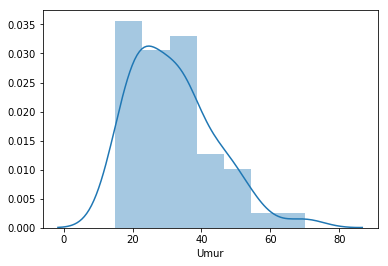

In [86]:
sns.distplot(data['Umur'])

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


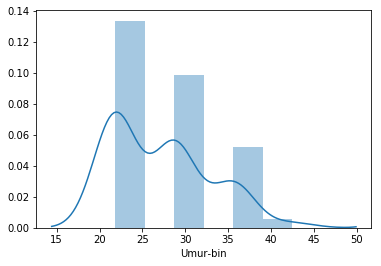

In [163]:
data['Umur-bin'] = [(pd.cut(data['Umur'],4)[x].left+pd.cut(data['Umur'],4)[0].right)/2 for x in range(len(data['Umur']))]
sns.distplot(data['Umur-bin'])

#### 7b.	Lakukan Use min-max normalization untuk mentransformasi nilai atribut Pendapatan ke dalam range [0.0-1.0].

In [164]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data[['Pendapatan']])
data['Pendapatan-minmax'] = scaler.transform(data[['Pendapatan']])
data.head()

,Jenis Kel,Pendapatan,Umur,Total,Rata-rata,Insidentil,Genre,Umur-bin,Pendapatan-minmax,Total-zscore
0,M,45000,25,27,2.5,Yes,Action,21.8475,0.500000,0.076560
1,F,54000,33,12,3.4,No,Drama,28.7500,0.602273,-1.434493
2,F,32000,20,42,1.6,No,Comedy,21.8475,0.352273,1.587613
3,F,59000,70,16,4.2,Yes,Drama,42.5000,0.659091,-1.031546
4,M,37000,35,25,3.2,Yes,Action,28.7500,0.409091,-0.124914


#### 7c.	Lakukan z-score normalization untuk menstandarkan nilai atribut Total.

In [165]:
from scipy.stats import zscore
data['Total-zscore'] = data[['Total']].apply(zscore)
data.head()

,Jenis Kel,Pendapatan,Umur,Total,Rata-rata,Insidentil,Genre,Umur-bin,Pendapatan-minmax,Total-zscore
0,M,45000,25,27,2.5,Yes,Action,21.8475,0.500000,0.076560
1,F,54000,33,12,3.4,No,Drama,28.7500,0.602273,-1.434493
2,F,32000,20,42,1.6,No,Comedy,21.8475,0.352273,1.587613
3,F,59000,70,16,4.2,Yes,Drama,42.5000,0.659091,-1.031546
4,M,37000,35,25,3.2,Yes,Action,28.7500,0.409091,-0.124914


#### 7d.	Buat distance matrik dari pelanggan 1 sampai pelanggan 5 (ukuran matrik adalah 5 x 5) sebelum dan sesudah normalisasi menggunakan min-max (7b) dan z-score (7c). NOTE: jarak dihitung menggunakan atribut Pendapatan dan Total.

In [178]:
from scipy.spatial.distance import squareform, pdist
subdata = data.head()
print('Sebelum normalisasi:')
print(pd.DataFrame(squareform(pdist(subdata[['Pendapatan','Total']].head())), columns=subdata.index, index=subdata.index))
print()
print('Sesudah normalisasi:')
print(pd.DataFrame(squareform(pdist(subdata[['Pendapatan-minmax','Total-zscore']].head())), columns=subdata.index, index=subdata.index))

Sebelum normalisasi:
              0             1             2             3             4
0      0.000000   9000.012500  13000.008654  14000.004321   8000.000250
1   9000.012500      0.000000  22000.020455   5000.001600  17000.004971
2  13000.008654  22000.020455      0.000000  27000.012519   5000.028900
3  14000.004321   5000.001600  27000.012519      0.000000  22000.001841
4   8000.000250  17000.004971   5000.028900  22000.001841      0.000000

Sesudah normalisasi:
          0         1         2         3         4
0  0.000000  1.514510  1.518257  1.119468  0.221034
1  1.514510  0.000000  3.032429  0.406934  1.323751
2  1.518257  3.032429  0.000000  2.637068  1.713469
3  1.119468  0.406934  2.637068  0.000000  0.940469
4  0.221034  1.323751  1.713469  0.940469  0.000000


#### 7e.	Ubah atribut Pendapatan (yang belum dinormalisasi) menjadi diskrit menggunakan kategori berikut:: High = 60K+; Mid = 25K-59K; Low = kurang dari $25K. Hitung jumlah pelanggan untuk masing-masing kategori Pendapatan.

In [192]:
category_range = [0,25000,60000,np.inf]
labels = ['Low','Mid','High']
data['Pendapatan-discrete'] = pd.cut(data['Pendapatan'], bins=category_range, labels=labels)
data.head()

,Jenis Kel,Pendapatan,Umur,Total,Rata-rata,Insidentil,Genre,Umur-bin,Pendapatan-minmax,Total-zscore,Pendapatan-discrete
0,M,45000,25,27,2.5,Yes,Action,21.8475,0.500000,0.076560,Mid
1,F,54000,33,12,3.4,No,Drama,28.7500,0.602273,-1.434493,Mid
2,F,32000,20,42,1.6,No,Comedy,21.8475,0.352273,1.587613,Mid
3,F,59000,70,16,4.2,Yes,Drama,42.5000,0.659091,-1.031546,Mid
4,M,37000,35,25,3.2,Yes,Action,28.7500,0.409091,-0.124914,Mid


In [191]:
data.groupby('Pendapatan-discrete').count()['Total']

Pendapatan-discrete
Low     12
Mid     28
High    10
Name: Total, dtype: int64